In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Train Data and EDA

In [15]:
train = pd.read_csv("train.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
train.info()
train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


(614, 13)

In [18]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [20]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [21]:
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [22]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [23]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [24]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [25]:
train['Loan_Status'].value_counts()   

Y    422
N    192
Name: Loan_Status, dtype: int64

Y is 422 and N is 192. It's a very unbalanced data.

In [26]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

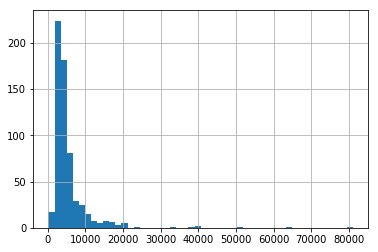

In [27]:
train['ApplicantIncome'].hist(bins=50)

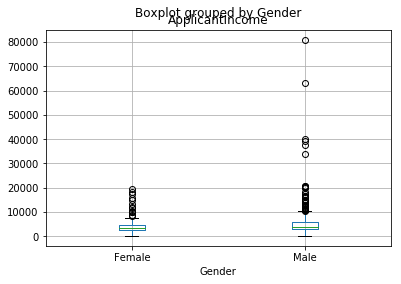

In [28]:
train.boxplot(column = 'ApplicantIncome', by = 'Gender')

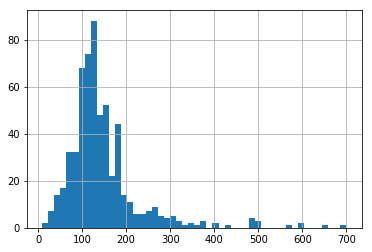

In [29]:
train['LoanAmount'].hist(bins = 50)

In [30]:
#Creation of pivot tables using python
#The probability of getting loan as per the credit history

ptable = train.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

ptable

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


In [31]:
#The probability of getting loan as per the Gender


ptable_gender = train.pivot_table(values='Gender',index=['Credit_History'],aggfunc=lambda x: x.map({'Female':1,'Male':0}).mean())

ptable_gender

,Gender
Credit_History,
0.0,0.197674
1.0,0.180258


# Missing Value Imputations

Here, mice can not be applied. There are categorical missing values and numerical one have some patterns.

In [32]:
train['Married'].fillna('Yes',inplace=True)

In [33]:
train['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [34]:
#6*2,6*6,6*10,6*14,6*20,6*30,6*40, 6*50, 6*60Pattern
#6* #Mean is 187.2
train['Loan_Amount_Term'].fillna(200,inplace=True)

In [35]:
print(train['Loan_Amount_Term'].unique())

[360. 120. 240. 200. 180.  60. 300. 480.  36.  84.  12.]


In [36]:
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace = True)
train['LoanAmount'] = train['LoanAmount'].apply(lambda x : round(x,2))

In [37]:
train['Gender'].fillna('Female',inplace=True)

In [38]:
train['Credit_History'].fillna(1,inplace=True)

In [39]:
#since *no* has ~82% so, we will fill the missing values of this column with "no"
train['Self_Employed'] = train['Self_Employed'].fillna('No')

Converting Property_Area to Numerical

In [40]:
# Rural 2
# Semi Urban 3
# Urban 4
def area(y):
    if 'Urban' in str(y):
        return 4
    elif 'Rural' in str(y):
        return 2
    else:
        return 3
train['Property_Area'] = train['Property_Area'].apply(area)

In [41]:
def convert_gender(x):
    if 'Male' in str(x):
        return 2
    elif 'Female' in str(x):
        return 1
    
train['Gender']=train['Gender'].apply(convert_gender)

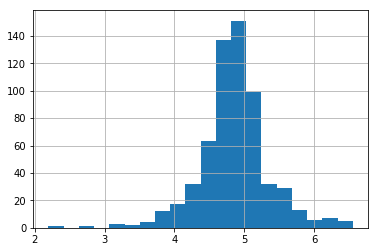

In [42]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) #log function to reduce the extreme effect in Loan amount (which we saw in the previous barplot)
train['LoanAmount_log'].hist(bins=20)

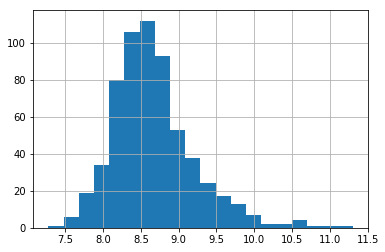

In [43]:
#to decrease the extreme values of ApplicantIncome (which can be ssen from the previous barplot), we can add CoApplicantIncome to compensate the value 
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['TotalIncome_log'] = np.log(train['TotalIncome'])
train['TotalIncome_log'].hist(bins=20)

# Creating New Features - Feature Engineering

In [44]:
train['Capacity%'] = ((train['LoanAmount'] / train['TotalIncome']) *100).astype(float) #capacity of each applicant of how well he/she is suited to pay back his loan.
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,Capacity%
0,LP001002,2,No,0,Graduate,No,5849,0.0,146.41,360.0,1.0,4,Y,4.986411,5849.0,8.674026,2.503163
1,LP001003,2,Yes,1,Graduate,No,4583,1508.0,128.00,360.0,1.0,2,N,4.852030,6091.0,8.714568,2.101461
2,LP001005,2,Yes,0,Graduate,Yes,3000,0.0,66.00,360.0,1.0,4,Y,4.189655,3000.0,8.006368,2.200000
3,LP001006,2,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,4,Y,4.787492,4941.0,8.505323,2.428658
4,LP001008,2,No,0,Graduate,No,6000,0.0,141.00,360.0,1.0,4,Y,4.948760,6000.0,8.699515,2.350000
5,LP001011,2,Yes,2,Graduate,Yes,5417,4196.0,267.00,360.0,1.0,4,Y,5.587249,9613.0,9.170872,2.777489
6,LP001013,2,Yes,0,Not Graduate,No,2333,1516.0,95.00,360.0,1.0,4,Y,4.553877,3849.0,8.255569,2.468174
7,LP001014,2,Yes,3+,Graduate,No,3036,2504.0,158.00,360.0,0.0,3,N,5.062595,5540.0,8.619750,2.851986
8,LP001018,2,Yes,2,Graduate,No,4006,1526.0,168.00,360.0,1.0,4,Y,5.123964,5532.0,8.618305,3.036876
9,LP001020,2,Yes,1,Graduate,No,12841,10968.0,349.00,360.0,1.0,3,N,5.855072,23809.0,10.077819,1.465832


In [236]:
train.shape

(614, 17)

Added 4 new columns

In [45]:
md = train['Married'].value_counts(ascending=True)
md.head()

No     213
Yes    401
Name: Married, dtype: int64

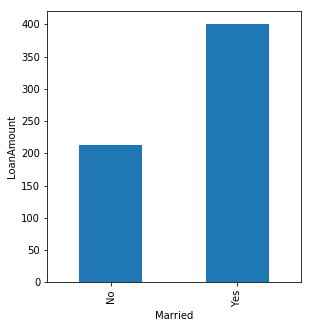

In [46]:
#Married vs Non-Married Loan Amount

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)

ax1.set_xlabel('Married')
ax1.set_ylabel('LoanAmount')

md.plot(kind='bar')

In [47]:
gender = train['Gender'].value_counts(ascending = True)

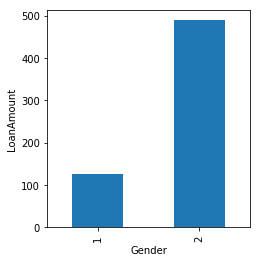

In [48]:
#Which gender has more loan amount 
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)

ax1.set_xlabel('Gender')
ax1.set_ylabel('LoanAmount')

gender.plot(kind='bar')

(array([179.,   0.,   0.,   0.,   0., 233.,   0.,   0.,   0., 202.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

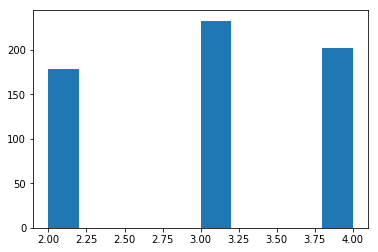

In [49]:
plt.hist(train['Property_Area'])

Remove "+" from Dependents and impute Missing Value

In [50]:
train['Dependents'] = train['Dependents'].str.replace("+","")

In [51]:
train['Dependents'].unique()

array(['0', '1', '2', '3', nan], dtype=object)

In [52]:
train['Dependents'].fillna(3,inplace=True)

In [53]:
train.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,Capacity%
0,LP001002,2,No,0,Graduate,No,5849,0.0,146.41,360.0,1.0,4,Y,4.986411,5849.0,8.674026,2.503163
1,LP001003,2,Yes,1,Graduate,No,4583,1508.0,128.00,360.0,1.0,2,N,4.852030,6091.0,8.714568,2.101461
2,LP001005,2,Yes,0,Graduate,Yes,3000,0.0,66.00,360.0,1.0,4,Y,4.189655,3000.0,8.006368,2.200000
3,LP001006,2,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,4,Y,4.787492,4941.0,8.505323,2.428658
4,LP001008,2,No,0,Graduate,No,6000,0.0,141.00,360.0,1.0,4,Y,4.948760,6000.0,8.699515,2.350000
5,LP001011,2,Yes,2,Graduate,Yes,5417,4196.0,267.00,360.0,1.0,4,Y,5.587249,9613.0,9.170872,2.777489
6,LP001013,2,Yes,0,Not Graduate,No,2333,1516.0,95.00,360.0,1.0,4,Y,4.553877,3849.0,8.255569,2.468174
7,LP001014,2,Yes,3,Graduate,No,3036,2504.0,158.00,360.0,0.0,3,N,5.062595,5540.0,8.619750,2.851986


# Label Encoder Transformation

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  

In [55]:
train['Married'] = le.fit_transform(train['Married'])

In [56]:
train['Education'] = le.fit_transform(train['Education'])

In [57]:
train['Self_Employed'] = le.fit_transform(train['Self_Employed'])

In [58]:
train['Loan_Status'] = le.fit_transform(train['Loan_Status'])

In [59]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,Capacity%
0,LP001002,2,0,0,0,0,5849,0.0,146.41,360.0,1.0,4,1,4.986411,5849.0,8.674026,2.503163
1,LP001003,2,1,1,0,0,4583,1508.0,128.00,360.0,1.0,2,0,4.852030,6091.0,8.714568,2.101461
2,LP001005,2,1,0,0,1,3000,0.0,66.00,360.0,1.0,4,1,4.189655,3000.0,8.006368,2.200000
3,LP001006,2,1,0,1,0,2583,2358.0,120.00,360.0,1.0,4,1,4.787492,4941.0,8.505323,2.428658
4,LP001008,2,0,0,0,0,6000,0.0,141.00,360.0,1.0,4,1,4.948760,6000.0,8.699515,2.350000


# Building Features

In [60]:
features = train.drop(['Loan_ID','Loan_Status'], axis =1)

In [61]:
features.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,Capacity%
0,2,0,0,0,0,5849,0.0,146.41,360.0,1.0,4,4.986411,5849.0,8.674026,2.503163
1,2,1,1,0,0,4583,1508.0,128.00,360.0,1.0,2,4.852030,6091.0,8.714568,2.101461
2,2,1,0,0,1,3000,0.0,66.00,360.0,1.0,4,4.189655,3000.0,8.006368,2.200000
3,2,1,0,1,0,2583,2358.0,120.00,360.0,1.0,4,4.787492,4941.0,8.505323,2.428658
4,2,0,0,0,0,6000,0.0,141.00,360.0,1.0,4,4.948760,6000.0,8.699515,2.350000


# Model Building

In [248]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn import model_selection
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

# Random Forest

In [249]:
RF = RandomForestClassifier(n_estimators=5, max_depth=3, random_state=4)
result = RF.fit(features, train['Loan_Status'])

# Logistic Regression

In [250]:
LR = LogisticRegression()
results1 = LR.fit(features, train['Loan_Status'])

# Decision Tree

In [251]:
DT = DecisionTreeClassifier(criterion = 'gini',max_depth = 5)#min_samples_leaf= 3)
results2 = DT.fit(features, train['Loan_Status'])

# Gradient Boosting

In [336]:
GB = GradientBoostingClassifier(n_estimators=85,max_depth=3)#,min_samples_split=2,loss = 'exponential',)
results3 = GB.fit(features, train['Loan_Status'])

# MLP Classifier

In [340]:
MLP = MLPClassifier(hidden_layer_sizes=(2,4,3,2),max_iter= 400, activation = 'logistic',solver = 'sgd', alpha=0.02)
results4 = MLP.fit(features,train['Loan_Status'])

# Naive Bayesian

In [268]:
GNB = GaussianNB()
results5 = GNB.fit(features,train['Loan_Status'])

# Bernoulli NB

In [337]:
BNB = BernoulliNB()
results6 = BNB.fit(features,train['Loan_Status'])

# Cross Validation

In [255]:
kfold = model_selection.KFold(n_splits=10)
final_result = model_selection.cross_val_score(RF, features, train['Loan_Status'], cv=10)
print("10-fold cross validation average accuracy: %.3f" % (final_result.mean()))

10-fold cross validation average accuracy: 0.795


In [256]:
final_result1 = model_selection.cross_val_score(LR, features, train['Loan_Status'], cv=10)
print("10-fold cross validation average accuracy: %.3f" % (final_result1.mean()))

10-fold cross validation average accuracy: 0.806


In [257]:
final_result2 = model_selection.cross_val_score(DT, features, train['Loan_Status'], cv=10)
print("10-fold cross validation average accuracy: %.3f" % (final_result2.mean()))

10-fold cross validation average accuracy: 0.795


In [338]:
final_result3 = model_selection.cross_val_score(GB, features, train['Loan_Status'], cv=10)
print("10-fold cross validation average accuracy: %.3f" % (final_result3.mean()))

10-fold cross validation average accuracy: 0.790


In [341]:
final_result4 = model_selection.cross_val_score(MLP, features, train['Loan_Status'], cv=10)
print("10-fold cross validation average accuracy: %.3f" % (final_result4.mean()))

10-fold cross validation average accuracy: 0.687


In [260]:
final_result5 = model_selection.cross_val_score(GNB, features, train['Loan_Status'], cv=10)
print("10-fold cross validation average accuracy: %.3f" % (final_result5.mean()))

10-fold cross validation average accuracy: 0.790


In [339]:
final_result6 = model_selection.cross_val_score(BNB, features, train['Loan_Status'], cv=10)
print("10-fold cross validation average accuracy: %.3f" % (final_result6.mean()))

10-fold cross validation average accuracy: 0.809


# Test Data

In [272]:
test = pd.read_csv("test.csv")

In [273]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [274]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# Missing Value Imputations

In [275]:
test['Property_Area'] = test['Property_Area'].apply(area)

In [276]:
test['Gender'].fillna('Female',inplace = True)

In [277]:
test['Gender']=test['Gender'].apply(convert_gender)

In [278]:
test['Dependents'] = test['Dependents'].str.replace("+","")

In [279]:
test['Dependents'].fillna(3,inplace=True)

In [280]:
test['Credit_History'].fillna(1,inplace=True)

In [281]:
test['Married'].fillna('Yes',inplace = True)

In [282]:
test['Self_Employed'].fillna('No',inplace = True)

In [283]:
test['Loan_Amount_Term'].fillna(108,inplace = True)

In [284]:
test['LoanAmount'].fillna(test['LoanAmount'].mean(),inplace = True)

In [285]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

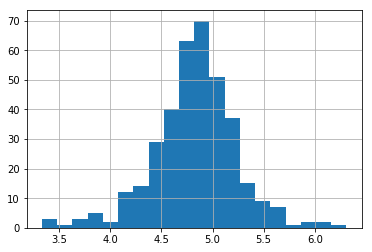

In [286]:
test['LoanAmount_log'] = np.log(test['LoanAmount']) #log function to reduce the extreme effect in Loan amount (which we saw in the previous barplot)
test['LoanAmount_log'].hist(bins=20)

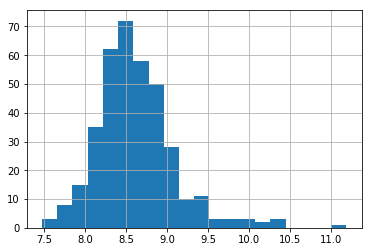

In [287]:
test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']
test['TotalIncome_log'] = np.log(test['TotalIncome'])
test['TotalIncome_log'].hist(bins=20)

In [288]:
test['Capacity%'] = ((test['LoanAmount'] / test['TotalIncome']) *100).astype(float) #capacity of each applicant of how well he/she is suited to pay back his loan.
test.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,Capacity%
0,LP001015,2,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,4,4.700480,5720,8.651724,1.923077
1,LP001022,2,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,4,4.836282,4576,8.428581,2.753497
2,LP001031,2,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,4,5.337538,6800,8.824678,3.058824
3,LP001035,2,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,4,4.605170,4886,8.494129,2.046664
4,LP001051,2,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,4,4.356709,3276,8.094378,2.380952
5,LP001054,2,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,4,5.023881,5587,8.628198,2.720601
6,LP001055,1,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,3,4.077537,2226,7.707962,2.650494
7,LP001056,2,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,2,4.990433,3881,8.263848,3.787684
8,LP001059,2,Yes,2,Graduate,No,13633,0,280.0,240.0,1.0,4,5.634790,13633,9.520249,2.053840
9,LP001067,2,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,3,4.812184,4800,8.476371,2.562500


In [289]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
Capacity%            0
dtype: int64

In [290]:
test['Married'] = le.fit_transform(test['Married'])

In [291]:
test['Education'] = le.fit_transform(test['Education'])

In [292]:
test['Self_Employed'] = le.fit_transform(test['Self_Employed'])

In [293]:
test1 = test.drop(['Loan_ID'],axis =1)

In [310]:
y_pred = MLP.predict(test1)

In [311]:
y_pred = pd.DataFrame(y_pred)

In [312]:
y_pred.head()

,0
0,1
1,1
2,1
3,1
4,1


In [313]:
Answer = pd.concat([test['Loan_ID'] ,y_pred],axis =1)
Answer.columns = ['Loan_ID','Loan_Status']

In [314]:
Answer['Loan_Status'].value_counts()

1    367
Name: Loan_Status, dtype: int64

In [315]:
Answer.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


After Label Encoder transformation, changing it back to Y and N format for final submission.

In [316]:
def convert_again(x):
    if '1' in str(x):
        return 'Y'
    else:
        return 'N'
Answer['Loan_Status'] = Answer['Loan_Status'].apply(convert_again)

In [317]:
Answer.to_csv('Loan_Status.csv', index = False)